In [1]:
import os
import pandas as pd
import numpy as np
import librosa

In [71]:
os.listdir('../Data')

['ICBHI_BMI_Filtered_18.csv',
 'ICBHI_Challenge_demographic_information.txt',
 'ICBHI_Filtered_To_BMI',
 'ICBHI_final_database',
 'ICBHI_final_database.zip',
 'ICBHI_Updated.csv']

In [72]:
data = pd.read_csv('../Data/ICBHI_Updated.csv')

In [73]:
data = data[data['Age'] >= 18].drop('Weight',axis=1).drop('Height',axis=1).dropna()

In [74]:
data

,ID,Age,Sex,BMI
2,103,70.0,F,33.00
3,104,70.0,F,28.47
5,106,73.0,F,21.00
6,107,75.0,F,33.70
8,109,84.0,F,33.53
...,...,...,...,...
114,215,56.0,F,25.35
117,218,75.0,M,26.29
118,219,81.0,M,26.00
119,220,66.0,M,35.40


In [75]:
data.to_csv('../Data/ICBHI_BMI_Filtered_18.csv')

In [76]:
files = os.listdir('../Data/ICBHI_Filtered_To_BMI')

In [77]:
for i in files:
    if i[-4:] == '.txt':
        os.remove('../Data/ICBHI_Filtered_To_BMI/' + i)

In [78]:
files = os.listdir('../Data/ICBHI_Filtered_To_BMI')

In [81]:
keep = []
toremove = []
for i, row in data.iterrows():
    keep.append(row['ID'])
for i in range(101,227):
    if i not in keep:
        toremove.append(str(i))
for i in files:
    if i[:3] in toremove:
        os.remove('../Data/ICBHI_Filtered_To_BMI/' + i)

In [106]:
category = []
for i, row in data.iterrows():
    if row['BMI'] < 18.5:
        category.append('Underweight')
    elif row['BMI'] >= 18.5 and row['BMI'] < 24.9:
        category.append('Normal')
    else:
        category.append('Overweight')
category = pd.DataFrame(category)
category.columns = ['Category']
category

,Category
0,Overweight
1,Overweight
2,Normal
3,Overweight
4,Overweight
...,...
70,Overweight
71,Overweight
72,Overweight
73,Overweight


In [109]:
data = data.reset_index(drop=True)

In [113]:
labelled = pd.concat([data,category],axis=1)
labelled.to_csv('../Data/ICBHI_BMI_Labelled.csv')
labelled

,ID,Age,Sex,BMI,Category
0,103,70.0,F,33.00,Overweight
1,104,70.0,F,28.47,Overweight
2,106,73.0,F,21.00,Normal
3,107,75.0,F,33.70,Overweight
4,109,84.0,F,33.53,Overweight
...,...,...,...,...,...
70,215,56.0,F,25.35,Overweight
71,218,75.0,M,26.29,Overweight
72,219,81.0,M,26.00,Overweight
73,220,66.0,M,35.40,Overweight


In [119]:
filteredFiles = os.listdir('../Data/ICBHI_Filtered_To_BMI')
filteredFiles

['103_2b2_Ar_mc_LittC2SE.wav',
 '104_1b1_Al_sc_Litt3200.wav',
 '104_1b1_Ar_sc_Litt3200.wav',
 '104_1b1_Ll_sc_Litt3200.wav',
 '104_1b1_Pl_sc_Litt3200.wav',
 '104_1b1_Pr_sc_Litt3200.wav',
 '106_2b1_Pl_mc_LittC2SE.wav',
 '106_2b1_Pr_mc_LittC2SE.wav',
 '107_2b3_Al_mc_AKGC417L.wav',
 '107_2b3_Ll_mc_AKGC417L.wav',
 '107_2b3_Lr_mc_AKGC417L.wav',
 '107_2b3_Pl_mc_AKGC417L.wav',
 '107_2b3_Pr_mc_AKGC417L.wav',
 '107_2b3_Tc_mc_AKGC417L.wav',
 '107_2b4_Al_mc_AKGC417L.wav',
 '107_2b4_Ar_mc_AKGC417L.wav',
 '107_2b4_Lr_mc_AKGC417L.wav',
 '107_2b4_Pl_mc_AKGC417L.wav',
 '107_2b4_Pr_mc_AKGC417L.wav',
 '107_2b4_Tc_mc_AKGC417L.wav',
 '107_2b5_Al_mc_AKGC417L.wav',
 '107_2b5_Ar_mc_AKGC417L.wav',
 '104_1b1_Lr_sc_Litt3200.wav',
 '107_2b3_Ar_mc_AKGC417L.wav',
 '107_2b4_Ll_mc_AKGC417L.wav',
 '107_2b5_Ll_mc_AKGC417L.wav',
 '107_3p2_Lr_mc_AKGC417L.wav',
 '109_1b1_Ll_sc_Litt3200.wav',
 '110_1p1_Pr_sc_Meditron.wav',
 '112_1p1_Pr_sc_Litt3200.wav',
 '114_1b4_Ar_mc_AKGC417L.wav',
 '117_1b2_Tc_mc_LittC2SE.wav',
 '120_1b

In [128]:
audio_data = '../Data/ICBHI_Filtered_To_BMI/' + filteredFiles[2]
x , sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


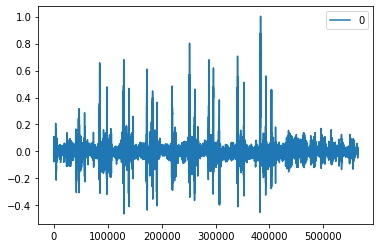

In [130]:
pd.DataFrame(x).plot()

In [2]:
os.listdir('../Data')

['ICBHI Processed Data',
 'ICBHI_BMI_Filtered_18.csv',
 'ICBHI_BMI_Labelled.csv',
 'ICBHI_Challenge_demographic_information.txt',
 'ICBHI_Filtered_To_BMI',
 'ICBHI_final_database',
 'ICBHI_final_database.zip',
 'ICBHI_Updated.csv']

In [10]:
filtered = pd.read_csv('../Data/ICBHI_BMI_Labelled.csv')
filtered = filtered.drop('Unnamed: 0',axis=1)
inclusionIDs = list(filtered['ID'])

In [16]:
files = os.listdir('../Data/ICBHI_Filtered_To_BMI')

In [29]:
dictList = {}
for i in inclusionIDs:
    for j in files:
        if str(i) in j:
            try:
                dictList[i].append(j)
            except:
                dictList[i] = []
                dictList[i].append(j)

In [ ]:
x , sr = librosa.load()

In [54]:
df = pd.DataFrame()
count = 0
for i in inclusionIDs:
    temp2 = pd.DataFrame()
    for j in dictList[i]:
        count += 1
        print('filecount:' + str(count) + ' filename: ' + str(j))
        if 'Tc' in j:
            if 'Tc' in temp2.columns:
                continue
        elif 'Al' in j:
            if 'Al' in temp2.columns:
                continue
        elif 'Ar' in j:
            if 'Ar' in temp2.columns:
                continue
        elif 'Pl' in j:
            if 'Pl' in temp2.columns:
                continue
        elif 'Pr' in j:
            if 'Pr' in temp2.columns:
                continue
        elif 'Ll' in j:
            if 'Ll' in temp2.columns:
                continue
        elif 'Lr' in j:
            if 'Lr' in temp2.columns:
                continue
    
        x , sr = librosa.load('../Data/ICBHI_Filtered_To_BMI/' + j)
        temp = pd.DataFrame(x)
        if 'Tc' in j:
            temp.columns = ['Tc']
        elif 'Al' in j:
            temp.columns = ['Al']
        elif 'Ar' in j:
            temp.columns = ['Ar']
        elif 'Pl' in j:
            temp.columns = ['Pl']
        elif 'Pr' in j:
            temp.columns = ['Pr']
        elif 'Ll' in j:
            temp.columns = ['Ll']
        elif 'Lr' in j:
            temp.columns = ['Lr']
        temp2 = pd.concat([temp2,temp],axis=1)
    temp2['Subject ID'] = i
    df = pd.concat([df,temp2],axis=0)
    count += 1
df

filecount:1 filename: 103_2b2_Ar_mc_LittC2SE.wav
filecount:3 filename: 104_1b1_Al_sc_Litt3200.wav
filecount:4 filename: 104_1b1_Ar_sc_Litt3200.wav
filecount:5 filename: 104_1b1_Ll_sc_Litt3200.wav
filecount:6 filename: 104_1b1_Pl_sc_Litt3200.wav
filecount:7 filename: 104_1b1_Pr_sc_Litt3200.wav
filecount:8 filename: 104_1b1_Lr_sc_Litt3200.wav
filecount:10 filename: 106_2b1_Pl_mc_LittC2SE.wav
filecount:11 filename: 106_2b1_Pr_mc_LittC2SE.wav
filecount:13 filename: 107_2b3_Al_mc_AKGC417L.wav
filecount:14 filename: 107_2b3_Ll_mc_AKGC417L.wav
filecount:15 filename: 107_2b3_Lr_mc_AKGC417L.wav
filecount:16 filename: 107_2b3_Pl_mc_AKGC417L.wav
filecount:17 filename: 107_2b3_Pr_mc_AKGC417L.wav
filecount:18 filename: 107_2b3_Tc_mc_AKGC417L.wav
filecount:19 filename: 107_2b4_Al_mc_AKGC417L.wav
filecount:20 filename: 107_2b4_Ar_mc_AKGC417L.wav
filecount:21 filename: 107_2b4_Lr_mc_AKGC417L.wav
filecount:22 filename: 107_2b4_Pl_mc_AKGC417L.wav
filecount:23 filename: 107_2b4_Pr_mc_AKGC417L.wav
filecou

filecount:183 filename: 132_2b2_Lr_mc_LittC2SE.wav
filecount:185 filename: 133_2p2_Al_mc_AKGC417L.wav
filecount:186 filename: 133_2p2_Ar_mc_AKGC417L.wav
filecount:187 filename: 133_2p2_Pl_mc_AKGC417L.wav
filecount:188 filename: 133_2p2_Tc_mc_AKGC417L.wav
filecount:189 filename: 133_2p3_Al_mc_AKGC417L.wav
filecount:190 filename: 133_2p3_Ar_mc_AKGC417L.wav
filecount:191 filename: 133_2p3_Pl_mc_AKGC417L.wav
filecount:192 filename: 133_2p3_Tc_mc_AKGC417L.wav
filecount:193 filename: 133_2p4_Al_mc_AKGC417L.wav
filecount:194 filename: 133_2p4_Ar_mc_AKGC417L.wav
filecount:195 filename: 133_2p4_Pl_mc_AKGC417L.wav
filecount:196 filename: 133_2p4_Pr_mc_AKGC417L.wav
filecount:197 filename: 133_2p4_Tc_mc_AKGC417L.wav
filecount:198 filename: 133_3p2_Ar_mc_AKGC417L.wav
filecount:199 filename: 133_3p2_Pl_mc_AKGC417L.wav
filecount:200 filename: 133_3p2_Pr_mc_AKGC417L.wav
filecount:201 filename: 133_3p4_Tc_mc_AKGC417L.wav
filecount:202 filename: 133_2p3_Pr_mc_AKGC417L.wav
filecount:203 filename: 133_3p2

filecount:368 filename: 156_2b3_Al_mc_AKGC417L.wav
filecount:369 filename: 156_2b3_Ar_mc_AKGC417L.wav
filecount:370 filename: 156_2b3_Ll_mc_AKGC417L.wav
filecount:371 filename: 156_2b3_Lr_mc_AKGC417L.wav
filecount:372 filename: 156_2b3_Pl_mc_AKGC417L.wav
filecount:373 filename: 156_5b3_Al_mc_AKGC417L.wav
filecount:374 filename: 156_5b3_Ar_mc_AKGC417L.wav
filecount:375 filename: 156_5b3_Ll_mc_AKGC417L.wav
filecount:376 filename: 156_5b3_Lr_mc_AKGC417L.wav
filecount:377 filename: 156_5b3_Pl_mc_AKGC417L.wav
filecount:378 filename: 156_5b3_Pr_mc_AKGC417L.wav
filecount:379 filename: 156_8b3_Ar_mc_AKGC417L.wav
filecount:380 filename: 156_8b3_Ll_mc_AKGC417L.wav
filecount:381 filename: 156_8b3_Lr_mc_AKGC417L.wav
filecount:382 filename: 156_8b3_Pl_mc_AKGC417L.wav
filecount:383 filename: 156_2b3_Pr_mc_AKGC417L.wav
filecount:384 filename: 156_8b3_Al_mc_AKGC417L.wav
filecount:386 filename: 157_1b1_Al_sc_Meditron.wav
filecount:387 filename: 157_1b1_Ar_sc_Meditron.wav
filecount:388 filename: 157_1b1

filecount:545 filename: 174_1p2_Ar_mc_AKGC417L.wav
filecount:546 filename: 174_1p2_Ll_mc_AKGC417L.wav
filecount:547 filename: 174_1p2_Lr_mc_AKGC417L.wav
filecount:548 filename: 174_1p2_Pl_mc_AKGC417L.wav
filecount:549 filename: 174_1p2_Pr_mc_AKGC417L.wav
filecount:550 filename: 174_1p3_Ar_mc_AKGC417L.wav
filecount:551 filename: 174_1p3_Ll_mc_AKGC417L.wav
filecount:552 filename: 174_1p3_Lr_mc_AKGC417L.wav
filecount:553 filename: 174_1p3_Pl_mc_AKGC417L.wav
filecount:554 filename: 174_1p3_Pr_mc_AKGC417L.wav
filecount:555 filename: 174_1p3_Tc_mc_AKGC417L.wav
filecount:556 filename: 174_1p4_Ll_mc_AKGC417L.wav
filecount:557 filename: 174_1p4_Lr_mc_AKGC417L.wav
filecount:558 filename: 174_1p4_Pl_mc_AKGC417L.wav
filecount:559 filename: 174_1p4_Pr_mc_AKGC417L.wav
filecount:560 filename: 174_1p4_Tc_mc_AKGC417L.wav
filecount:561 filename: 174_2p3_Al_mc_AKGC417L.wav
filecount:562 filename: 174_2p3_Ar_mc_AKGC417L.wav
filecount:563 filename: 174_2p3_Pr_mc_AKGC417L.wav
filecount:564 filename: 174_2p3

filecount:721 filename: 198_1b5_Ar_mc_AKGC417L.wav
filecount:722 filename: 198_1b5_Ll_mc_AKGC417L.wav
filecount:723 filename: 198_1b5_Lr_mc_AKGC417L.wav
filecount:724 filename: 198_1b5_Pl_mc_AKGC417L.wav
filecount:725 filename: 198_1b5_Pr_mc_AKGC417L.wav
filecount:726 filename: 198_1b5_Tc_mc_AKGC417L.wav
filecount:727 filename: 198_6p1_Al_mc_AKGC417L.wav
filecount:728 filename: 198_6p1_Ll_mc_AKGC417L.wav
filecount:729 filename: 198_6p1_Lr_mc_AKGC417L.wav
filecount:730 filename: 198_6p1_Pl_mc_AKGC417L.wav
filecount:731 filename: 198_6p1_Pr_mc_AKGC417L.wav
filecount:732 filename: 198_6p1_Tc_mc_AKGC417L.wav
filecount:733 filename: 198_1b5_Al_mc_AKGC417L.wav
filecount:734 filename: 198_6p1_Ar_mc_AKGC417L.wav
filecount:736 filename: 199_2b3_Ll_mc_LittC2SE.wav
filecount:737 filename: 199_2b1_Ll_mc_LittC2SE.wav
filecount:739 filename: 104_1b1_Al_sc_Litt3200.wav
filecount:740 filename: 104_1b1_Ar_sc_Litt3200.wav
filecount:741 filename: 104_1b1_Ll_sc_Litt3200.wav
filecount:742 filename: 104_1b1

filecount:898 filename: 207_3b2_Pl_mc_AKGC417L.wav
filecount:899 filename: 207_3b2_Pr_mc_AKGC417L.wav
filecount:900 filename: 207_3b2_Tc_mc_AKGC417L.wav
filecount:901 filename: 207_2b2_Al_mc_AKGC417L.wav
filecount:902 filename: 207_2b3_Ar_mc_AKGC417L.wav
filecount:903 filename: 207_2b4_Tc_mc_AKGC417L.wav
filecount:905 filename: 211_1p2_Pl_mc_AKGC417L.wav
filecount:906 filename: 211_1p2_Pr_mc_AKGC417L.wav
filecount:907 filename: 211_1p3_Ar_mc_AKGC417L.wav
filecount:908 filename: 211_1p2_Ar_mc_AKGC417L.wav
filecount:909 filename: 211_1p5_Ar_mc_AKGC417L.wav
filecount:910 filename: 211_2p2_Tc_mc_AKGC417L.wav
filecount:911 filename: 211_2p3_Tc_mc_AKGC417L.wav
filecount:912 filename: 211_2p4_Tc_mc_AKGC417L.wav
filecount:914 filename: 212_2b2_Tc_mc_LittC2SE.wav
filecount:916 filename: 213_1p2_Lr_mc_AKGC417L.wav
filecount:917 filename: 213_1p5_Al_mc_AKGC417L.wav
filecount:918 filename: 213_2p2_Pl_mc_AKGC417L.wav
filecount:919 filename: 213_1p2_Al_mc_AKGC417L.wav
filecount:920 filename: 213_1p2

,Ar,Subject ID,Al,Ll,Pl,Pr,Lr,Tc
0,-0.251950,103,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.372439,103,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.322191,103,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.349854,103,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.326563,103,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
440995,0.190506,221,0.085495,NaN,-0.112571,0.224091,-0.054869,NaN
440996,0.194844,221,0.085891,NaN,-0.112633,0.227737,-0.056111,NaN
440997,0.193453,221,0.083907,NaN,-0.109273,0.225253,-0.055844,NaN
440998,0.191564,221,0.081653,NaN,-0.105542,0.222425,-0.055553,NaN


In [60]:
df.loc[~(df==0).all(axis=1)]

,Ar,Subject ID,Al,Ll,Pl,Pr,Lr,Tc
0,-0.251950,103,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.372439,103,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.322191,103,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.349854,103,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.326563,103,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
440995,0.190506,221,0.085495,NaN,-0.112571,0.224091,-0.054869,NaN
440996,0.194844,221,0.085891,NaN,-0.112633,0.227737,-0.056111,NaN
440997,0.193453,221,0.083907,NaN,-0.109273,0.225253,-0.055844,NaN
440998,0.191564,221,0.081653,NaN,-0.105542,0.222425,-0.055553,NaN


In [70]:
df.isna().sum()

Ar            10659897
Subject ID           0
Al            12856388
Ll            24053027
Pl            15520208
Pr            12454552
Lr            15579301
Tc            23350429
dtype: int64

In [ ]:
df = df.drop(['Ll','Tc'],axis=1).dropna()
df

In [2]:
df = pd.read_csv('../Data/ICBHI Processed Data/Filtered_Processed_Unlabelled_Data.csv')
df

,Unnamed: 0,Ar,Subject ID,Al,Pl,Pr,Lr
0,0,0.000795,104,0.000033,0.001107,1.877107e-07,-0.000647
1,1,0.000903,104,0.000007,0.001305,3.126164e-06,-0.000778
2,2,0.000914,104,-0.000038,0.001406,7.572315e-06,-0.000861
3,3,0.000787,104,-0.000098,0.001361,1.339925e-05,-0.000864
4,4,0.000488,104,-0.000169,0.001121,2.015440e-05,-0.000759
...,...,...,...,...,...,...,...
19232054,440995,0.190506,221,0.085495,-0.112571,2.240909e-01,-0.054869
19232055,440996,0.194844,221,0.085891,-0.112633,2.277366e-01,-0.056111
19232056,440997,0.193453,221,0.083907,-0.109273,2.252532e-01,-0.055844
19232057,440998,0.191564,221,0.081653,-0.105542,2.224249e-01,-0.055553


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,Ar,Subject ID,Al,Pl,Pr,Lr
0,0.000795,104,0.000033,0.001107,1.877107e-07,-0.000647
1,0.000903,104,0.000007,0.001305,3.126164e-06,-0.000778
2,0.000914,104,-0.000038,0.001406,7.572315e-06,-0.000861
3,0.000787,104,-0.000098,0.001361,1.339925e-05,-0.000864
4,0.000488,104,-0.000169,0.001121,2.015440e-05,-0.000759
...,...,...,...,...,...,...
19232054,0.190506,221,0.085495,-0.112571,2.240909e-01,-0.054869
19232055,0.194844,221,0.085891,-0.112633,2.277366e-01,-0.056111
19232056,0.193453,221,0.083907,-0.109273,2.252532e-01,-0.055844
19232057,0.191564,221,0.081653,-0.105542,2.224249e-01,-0.055553


In [12]:
grouped = df.groupby('Subject ID')

In [19]:
demographics = pd.read_csv('../Data/ICBHI_BMI_Labelled.csv')
demoDict = {}
for i, row in demographics.iterrows():
    demoDict[row['ID']] = row['Category']

In [23]:
dfLabelled = pd.DataFrame()
for name, group in grouped:
    group['Category'] = demoDict[name]
    dfLabelled = pd.concat([dfLabelled,group],axis=0)
    count += 1
dfLabelled

,Ar,Subject ID,Al,Pl,Pr,Lr,Category
0,0.000795,104,0.000033,0.001107,1.877107e-07,-0.000647,Overweight
1,0.000903,104,0.000007,0.001305,3.126164e-06,-0.000778,Overweight
2,0.000914,104,-0.000038,0.001406,7.572315e-06,-0.000861,Overweight
3,0.000787,104,-0.000098,0.001361,1.339925e-05,-0.000864,Overweight
4,0.000488,104,-0.000169,0.001121,2.015440e-05,-0.000759,Overweight
...,...,...,...,...,...,...,...
19232054,0.190506,221,0.085495,-0.112571,2.240909e-01,-0.054869,Overweight
19232055,0.194844,221,0.085891,-0.112633,2.277366e-01,-0.056111,Overweight
19232056,0.193453,221,0.083907,-0.109273,2.252532e-01,-0.055844,Overweight
19232057,0.191564,221,0.081653,-0.105542,2.224249e-01,-0.055553,Overweight


In [28]:
dfLabelled.to_csv('../Data/ICBHI Processed Data/Filtered_Processed_Labelled_Data.csv')